In [3]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [4]:
import numpy as np
import copy
from datetime import datetime

import src.utils as utils
from src.nqs import RBM, RandomHamiltonian

import matplotlib.pyplot as plt
%matplotlib notebook


In [5]:
visible_size = 5
hidden_size = 10
seed = 42  # Seed for random number generator
gradient_steps = 500
walker_steps = 0 # Using exact distribution to calculate energies
learning_rate = 0.01


In [6]:
eig,_ = np.linalg.eigh(hamiltonian)
I_truth = np.min(eig)
print(f"E_truth: {I_truth}")


NameError: name 'hamiltonian' is not defined

In [7]:
np.random.seed(seed)
hamiltonian = RandomHamiltonian(n=visible_size)
rbm_analytic = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=hamiltonian, walker_steps=walker_steps)

eig,_ = np.linalg.eigh(hamiltonian)
I_truth = np.min(eig)
print(f"E_truth: {I_truth}")

finites = []
h_values =[1, 0.5, 0.1, 0.01]
for h in h_values:
    
    
    rbm_finite = copy.deepcopy(rbm_analytic)
    energy_list_finite = [it for it in rbm_finite.train(iterations=gradient_steps, lr=0.01, h=h, analytical_grad=False, print_energy=False)]
    finites.append(energy_list_finite)
    
energy_list_analytical = [it for it in rbm_analytic.train(iterations=gradient_steps, lr=0.01, analytical_grad=True, print_energy=False)]



E_truth: -21.12676076644112
func:train args:[(<src.nqs.RBM object at 0x0000026D06043190>,), {'iterations': 500, 'lr': 0.01, 'h': 1, 'analytical_grad': False, 'print_energy': False}] took: 36.23260807991028 sec
func:train args:[(<src.nqs.RBM object at 0x0000026D06043DF0>,), {'iterations': 500, 'lr': 0.01, 'h': 0.5, 'analytical_grad': False, 'print_energy': False}] took: 35.9113986492157 sec
func:train args:[(<src.nqs.RBM object at 0x0000026D06043430>,), {'iterations': 500, 'lr': 0.01, 'h': 0.1, 'analytical_grad': False, 'print_energy': False}] took: 34.6563937664032 sec
func:train args:[(<src.nqs.RBM object at 0x0000026D06043C10>,), {'iterations': 500, 'lr': 0.01, 'h': 0.01, 'analytical_grad': False, 'print_energy': False}] took: 33.572524547576904 sec
func:train args:[(<src.nqs.RBM object at 0x0000026D044C6340>,), {'iterations': 500, 'lr': 0.01, 'analytical_grad': True, 'print_energy': False}] took: 1.9049770832061768 sec


<IPython.core.display.Javascript object>


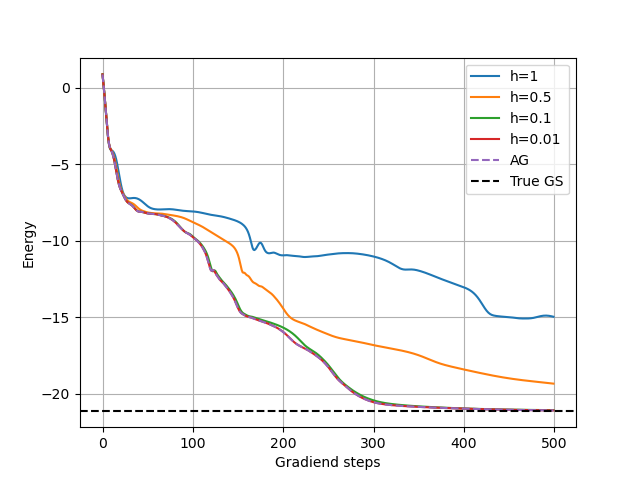

In [16]:
plt.figure(1)

#plt.plot(energy_list_analytical)
for finite in finites:
    plt.plot(finite)
    
plt.plot(energy_list_analytical, '--')
plt.axhline(y=I_truth, color='k', linestyle='--')

#plt.title("Analytic/Finite difference gradient comparison")
legend = copy.copy(h_values)

legend=[f"h={l}" for l in legend]
legend.append('AG')
legend.append('True GS')
plt.legend(legend)
plt.xlabel('Gradiend steps')
plt.ylabel('Energy')
plt.grid()

In [17]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/Analytic vs FD gradient.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")